<a href="https://colab.research.google.com/github/SepideHematian/NLP_690_course/blob/main/Homework/Tahereh_Hematian_HW3_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split, KFold

In [ ]:
from zipfile import ZipFile

with ZipFile('/content/train.tsv.zip', mode = 'r') as file:
  file.extractall(path = '/content/')
with ZipFile('/content/test.tsv.zip', mode = 'r') as file:
  file.extractall(path = '/content/')

In [ ]:
train = pd.read_csv('/content/train.tsv', sep='\t')
test = pd.read_csv("/content/test.tsv", sep='\t')
train['Sentiment'] = train['Sentiment'].apply(str)

In [ ]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.8+ MB


There are five categories of sentiment in this example:

- 0 — negative
- 1 — somewhat negative
- 2 — neutral
- 3 — somewhat positive
- 4 — positive


In [ ]:
train['Sentiment'].unique()

array(['1', '2', '3', '4', '0'], dtype=object)

In [ ]:
train.groupby('Sentiment')['Sentiment'].count()

Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
Name: Sentiment, dtype: int64

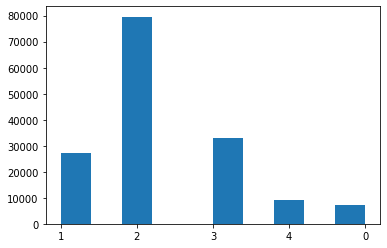

In [ ]:
sentiment_categ_num = train['Sentiment']
plt.hist(sentiment_categ_num);

In [ ]:
corpus = train['Phrase'][:len(train)//3]

In [ ]:
from sklearn.feature_extraction import text
vectorizer = text.CountVectorizer(binary=True).fit(corpus)
vectorized_text = vectorizer.transform(corpus)
print(vectorized_text.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(vectorizer.vocabulary_)

{'series': 6378, 'of': 4984, 'escapades': 2458, 'demonstrating': 1866, 'the': 7307, 'adage': 154, 'that': 7306, 'what': 8028, 'is': 3890, 'good': 3154, 'for': 2883, 'goose': 3163, 'also': 282, 'gander': 3031, 'some': 6698, 'which': 8040, 'occasionally': 4968, 'amuses': 321, 'but': 997, 'none': 4899, 'amounts': 317, 'to': 7417, 'much': 4741, 'story': 6936, 'this': 7339, 'quiet': 5712, 'introspective': 3855, 'and': 332, 'entertaining': 2418, 'independent': 3699, 'worth': 8167, 'seeking': 6333, 'even': 2493, 'fans': 2681, 'ismail': 3892, 'merchant': 4558, 'work': 8147, 'suspect': 7132, 'would': 8171, 'have': 3354, 'hard': 3325, 'time': 7391, 'sitting': 6564, 'through': 7367, 'one': 5007, 'positively': 5460, 'thrilling': 7363, 'combination': 1377, 'ethnography': 2485, 'all': 268, 'intrigue': 3850, 'betrayal': 714, 'deceit': 1788, 'murder': 4755, 'shakespearean': 6417, 'tragedy': 7483, 'or': 5041, 'juicy': 3985, 'soap': 6670, 'opera': 5022, 'aggressive': 230, 'self': 6343, 'glorification': 

In [ ]:
!pip install rank_bm25

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rank_bm25 import BM25Okapi

tokenized_corpus = [doc.split(" ") for doc in corpus]
bm25 = BM25Okapi(tokenized_corpus)
query = "windy London"
tokenized_query = query.split(" ")
doc_scores = bm25.get_scores(tokenized_query)
bm25.get_top_n(tokenized_query, corpus, n=1)

['London']

In [ ]:
import re
text = train['Phrase']
text = re.sub("[^A-Za-z]+", " ", text[0])

In [ ]:
import nltk
nltk.download('all')

# sample text for performing tokenization
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize
# Passing the string text into word tokenize for breaking the sentences
text = train['Phrase']
token = word_tokenize(text[0])
token

In [ ]:

def preprocess_text(text: str, remove_stopwords: bool) -> str:
  """This utility function sanitizes a string by:
  - removing links
  - removing special characters
  - removing numbers
  - removing stopwords
  - transforming in lowercase
  - removing excessive whitespaces
  Args:
  text (str): the input text you want to clean
  remove_stopwords (bool): whether or not to remove stopwords
  Returns:
  str: the cleaned text
  """
  # remove links
  text = re.sub(r"http\S+", "", text)
  # remove special chars and numbers
  text = re.sub("[^A-Za-z]+", " ", text)
  # remove stopwords
  if remove_stopwords:
  # 1. tokenize
  tokens = nltk.word_tokenize(text)
  # 2. check if stopword
  tokens = [w for w in tokens if not w.lower() in stopwords.words("english"
  # 3. join back together
  text = " ".join(tokens)
  # return text in lower case and stripped of whitespaces
  text = text.lower().strip()
  return text

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['Phrase'], train['Sentiment'],
                                                                      test_size=0.30, random_state = 0)

https://colab.research.google.com/drive/13HVf7nfZstc5c2ZMLuuNub37Rbwu0-Km?authuser=1

In [ ]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(train['Phrase'])
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(train['Phrase'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(train['Phrase'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(train['Phrase'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  "The parameter 'token_pattern' will not be used"


In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print( "NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print( "NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.6089751804861379
NB, WordLevel TF-IDF:  0.5829381861677133
NB, N-Gram Vectors:  0.5520312700243496
NB, CharLevel Vectors:  0.5493827160493827


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(train['Phrase'])
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([train['Phrase'][0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'series': 11837, 'of': 9227, 'escapades': 4577, 'demonstrating': 3490, 'the': 13505, 'adage': 288, 'that': 13503, 'what': 14871, 'is': 7217, 'good': 5821, 'for': 5323, 'goose': 5837, 'also': 529, 'gander': 5595, 'some': 12424, 'which': 14888, 'occasionally': 9204, 'amuses': 602, 'but': 1879, 'none': 9085, 'amounts': 593, 'to': 13681, 'much': 8807, 'story': 12857, 'this': 13556, 'quiet': 10585, 'introspective': 7143, 'and': 625, 'entertaining': 4500, 'independent': 6840, 'worth': 15096, 'seeking': 11750, 'even': 4642, 'fans': 4942, 'ismail': 7222, 'merchant': 8449, 'work': 15068, 'suspect': 13190, 'would': 15100, 'have': 6210, 'hard': 6156, 'time': 13644, 'sitting': 12159, 'through': 13598, 'one': 9272, 'positively': 10123, 'thrilling': 13591, 'combination': 2573, 'ethnography': 4621, 'all': 506, 'intrigue': 7133, 'betrayal': 1348, 'deceit': 3353, 'murder': 8831, 'shakespearean': 11909, 'tragedy': 13799, 'or': 9326, 'juicy': 7400, 'soap': 12372, 'opera': 9296, 'aggressive': 432, 'self'

In [ ]:
  # Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print( "LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print( "LR, CharLevel Vectors: ", accuracy)
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)
# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("RF, WordLevel TF-IDF: ", accuracy)
# Extreme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)

# Extreme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print("Xgb, CharLevel Vectors: ", accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR, WordLevel TF-IDF:  0.5017941817249776


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR, N-Gram Vectors:  0.5009825280874877


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR, CharLevel Vectors:  0.5079670212311505


In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(test['Phrase'])
xtest_tfidf =  tfidf_vect.transform(test)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(test['Phrase'])
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(test)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(test['Phrase'])
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(test) 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  "The parameter 'token_pattern' will not be used"


In [ ]:
model = naive_bayes.MultinomialNB()
xtest_count =  count_vect.transform(test['Phrase'])
# Naive Bayes on Count Vectors
accuracy = train_model(model, xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy)


NB, Count Vectors:  0.6089751804861379


In [ ]:
# predict the labels on test dataset
predictions = model.predict(xtest_count)

xvalid_count = count_vect.transform(valid_x)
metrics.accuracy_score(predictions, valid_y)

**Exercise 2:**


In [ ]:
! aws comprehend detect-entities \
--region "us-east-2" \
--language-code "en" \
--text "It is raining today in Seattle."

/bin/bash: aws: command not found


In [ ]:
! pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 5.2 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 9.1 MB 47.6 MB/s 
     |████████████████████████████████| 140 kB 47.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [ ]:
{
"Entities": [
{
"Text": "today",
"Score": 0.97,
"Type": "DATE",
"BeginOffset": 14,
"EndOffset": 19
},
{
"Text": "Seattle",
"Score": 0.95,
"Type": "LOCATION",
"BeginOffset": 23,
"EndOffset": 30
}
],
"LanguageCode": "en"
}

{'Entities': [{'Text': 'today',
   'Score': 0.97,
   'Type': 'DATE',
   'BeginOffset': 14,
   'EndOffset': 19},
  {'Text': 'Seattle',
   'Score': 0.95,
   'Type': 'LOCATION',
   'BeginOffset': 23,
   'EndOffset': 30}],
 'LanguageCode': 'en'}

In [ ]:
{
    "Entities": [
        {
            "Score": 0.6943220496177673,
            "Type": "ORGANIZATION",
            "Text": "United Kingdom",
            "BeginOffset": 4,
            "EndOffset": 18
        },
        {
            "Score": 0.965940535068512,
            "Type": "QUANTITY",
            "Text": "one",
            "BeginOffset": 28,
            "EndOffset": 31
        },
        {
            "Score": 0.5998692512512207,
            "Type": "QUANTITY",
            "Text": "the worst recessions",
            "BeginOffset": 35,
            "EndOffset": 55
        },
        {
            "Score": 0.9969571828842163,
            "Type": "DATE",
            "Text": "last year",
            "BeginOffset": 78,
            "EndOffset": 87
        },
        {
            "Score": 0.891194224357605,
            "Type": "ORGANIZATION",
            "Text": "Germany",
            "BeginOffset": 89,
            "EndOffset": 96
        },
        {
            "Score": 0.9560476541519165,
            "Type": "EVENT",
            "Text": "pandemic",
            "BeginOffset": 133,
            "EndOffset": 141
        },
        {
            "Score": 0.7481787800788879,
            "Type": "EVENT",
            "Text": "global financial crisis",
            "BeginOffset": 165,
            "EndOffset": 188
        },
        {
            "Score": 0.8721399307250977,
            "Type": "ORGANIZATION",
            "Text": "Europe",
            "BeginOffset": 220,
            "EndOffset": 226
        },
        {
            "Score": 0.9977238178253174,
            "Type": "QUANTITY",
            "Text": "5%",
            "BeginOffset": 259,
            "EndOffset": 261
        },
        {
            "Score": 0.9953489899635315,
            "Type": "DATE",
            "Text": "last year",
            "BeginOffset": 262,
            "EndOffset": 271
        },
        {
            "Score": 0.9918688535690308,
            "Type": "ORGANIZATION",
            "Text": "EU",
            "BeginOffset": 273,
            "EndOffset": 275
        },
        {
            "Score": 0.999082624912262,
            "Type": "QUANTITY",
            "Text": "6.4%",
            "BeginOffset": 319,
            "EndOffset": 323
        },
        {
            "Score": 0.9969431757926941,
            "Type": "ORGANIZATION",
            "Text": "Eurostat",
            "BeginOffset": 338,
            "EndOffset": 346
        },
        {
            "Score": 0.9143708348274231,
            "Type": "ORGANIZATION",
            "Text": "United States",
            "BeginOffset": 352,
            "EndOffset": 365
        },
        {
            "Score": 0.9984835982322693,
            "Type": "QUANTITY",
            "Text": "3.5%",
            "BeginOffset": 422,
            "EndOffset": 426
        },
        {
            "Score": 0.9177772402763367,
            "Type": "DATE",
            "Text": "prior year",
            "BeginOffset": 436,
            "EndOffset": 446
        },
        {
            "Score": 0.9788714051246643,
            "Type": "DATE",
            "Text": "Today",
            "BeginOffset": 449,
            "EndOffset": 454
        },
        {
            "Score": 0.6137206554412842,
            "Type": "EVENT",
            "Text": "pandemic",
            "BeginOffset": 538,
            "EndOffset": 546
        },
        {
            "Score": 0.8908014893531799,
            "Type": "ORGANIZATION",
            "Text": "UK",
            "BeginOffset": 600,
            "EndOffset": 602
        },
        {
            "Score": 0.8511954545974731,
            "Type": "PERSON",
            "Text": "finance minister",
            "BeginOffset": 603,
            "EndOffset": 619
        },
        {
            "Score": 0.9979281425476074,
            "Type": "PERSON",
            "Text": "Rishi Sunak",
            "BeginOffset": 620,
            "EndOffset": 631
        },
        {
            "Score": 0.9953264594078064,
            "Type": "LOCATION",
            "Text": "United Kingdom",
            "BeginOffset": 873,
            "EndOffset": 887
        },
        {
            "Score": 0.9994669556617737,
            "Type": "DATE",
            "Text": "January 5",
            "BeginOffset": 900,
            "EndOffset": 909
        },
        {
            "Score": 0.9953036904335022,
            "Type": "DATE",
            "Text": "first quarter of 2021",
            "BeginOffset": 954,
            "EndOffset": 975
        },
        {
            "Score": 0.9925207495689392,
            "Type": "DATE",
            "Text": "fourth quarter of 2020",
            "BeginOffset": 1015,
            "EndOffset": 1037
        },
        {
            "Score": 0.7066783308982849,
            "Type": "QUANTITY",
            "Text": "double dip",
            "BeginOffset": 1056,
            "EndOffset": 1066
        },
        {
            "Score": 0.999747097492218,
            "Type": "PERSON",
            "Text": "Sam Miley",
            "BeginOffset": 1129,
            "EndOffset": 1138
        },
        {
            "Score": 0.9847570657730103,
            "Type": "LOCATION",
            "Text": "London",
            "BeginOffset": 1160,
            "EndOffset": 1166
        },
        {
            "Score": 0.9986919164657593,
            "Type": "ORGANIZATION",
            "Text": "Centre for Economics and Business Research",
            "BeginOffset": 1173,
            "EndOffset": 1215
        },
        {
            "Score": 0.998776376247406,
            "Type": "DATE",
            "Text": "Friday",
            "BeginOffset": 1234,
            "EndOffset": 1240
        },
        {
            "Score": 0.9375461339950562,
            "Type": "ORGANIZATION",
            "Text": "EU",
            "BeginOffset": 1256,
            "EndOffset": 1258
        },
        {
            "Score": 0.4949708580970764,
            "Type": "ORGANIZATION",
            "Text": "UK",
            "BeginOffset": 1259,
            "EndOffset": 1261
        },
        {
            "Score": 0.9861866235733032,
            "Type": "EVENT",
            "Text": "Brexit",
            "BeginOffset": 1293,
            "EndOffset": 1299
        },
        {
            "Score": 0.9995026588439941,
            "Type": "DATE",
            "Text": "December 31",
            "BeginOffset": 1321,
            "EndOffset": 1332
        }
    ]
}

In [ ]:
{
    "KeyPhrases": [
        {
            "Score": 0.9999681711196899,
            "Text": "The United Kingdom",
            "BeginOffset": 0,
            "EndOffset": 18
        },
        {
            "Score": 0.999930202960968,
            "Text": "the worst recessions",
            "BeginOffset": 35,
            "EndOffset": 55
        },
        {
            "Score": 0.999966025352478,
            "Text": "major economies",
            "BeginOffset": 62,
            "EndOffset": 77
        },
        {
            "Score": 0.9998839497566223,
            "Text": "last year",
            "BeginOffset": 78,
            "EndOffset": 87
        },
        {
            "Score": 0.9999004602432251,
            "Text": "Germany",
            "BeginOffset": 89,
            "EndOffset": 96
        },
        {
            "Score": 0.9952163696289062,
            "Text": "the pandemic",
            "BeginOffset": 129,
            "EndOffset": 141
        },
        {
            "Score": 0.9999713897705078,
            "Text": "the global financial crisis",
            "BeginOffset": 161,
            "EndOffset": 188
        },
        {
            "Score": 0.9999144673347473,
            "Text": "Provisional estimates",
            "BeginOffset": 190,
            "EndOffset": 211
        },
        {
            "Score": 0.9999849796295166,
            "Text": "Europe",
            "BeginOffset": 220,
            "EndOffset": 226
        },
        {
            "Score": 0.9998587965965271,
            "Text": "biggest economy",
            "BeginOffset": 229,
            "EndOffset": 244
        },
        {
            "Score": 0.9990471005439758,
            "Text": "5%",
            "BeginOffset": 259,
            "EndOffset": 261
        },
        {
            "Score": 0.9985668659210205,
            "Text": "last year",
            "BeginOffset": 262,
            "EndOffset": 271
        },
        {
            "Score": 0.9982982873916626,
            "Text": "EU GDP",
            "BeginOffset": 273,
            "EndOffset": 279
        },
        {
            "Score": 0.9989779591560364,
            "Text": "6.4%",
            "BeginOffset": 319,
            "EndOffset": 323
        },
        {
            "Score": 0.9997745156288147,
            "Text": "Eurostat",
            "BeginOffset": 338,
            "EndOffset": 346
        },
        {
            "Score": 0.9999457597732544,
            "Text": "The United States",
            "BeginOffset": 348,
            "EndOffset": 365
        },
        {
            "Score": 0.9997013211250305,
            "Text": "comparison",
            "BeginOffset": 387,
            "EndOffset": 397
        },
        {
            "Score": 0.9949432015419006,
            "Text": "GDP",
            "BeginOffset": 404,
            "EndOffset": 407
        },
        {
            "Score": 0.9989801645278931,
            "Text": "3.5%",
            "BeginOffset": 422,
            "EndOffset": 426
        },
        {
            "Score": 0.9999103546142578,
            "Text": "the prior year",
            "BeginOffset": 432,
            "EndOffset": 446
        },
        {
            "Score": 0.9998975992202759,
            "Text": "Today",
            "BeginOffset": 449,
            "EndOffset": 454
        },
        {
            "Score": 0.9993313550949097,
            "Text": "figures",
            "BeginOffset": 457,
            "EndOffset": 464
        },
        {
            "Score": 0.9999848008155823,
            "Text": "the economy",
            "BeginOffset": 475,
            "EndOffset": 486
        },
        {
            "Score": 0.9999517798423767,
            "Text": "a serious shock",
            "BeginOffset": 503,
            "EndOffset": 518
        },
        {
            "Score": 0.9999697804450989,
            "Text": "a result",
            "BeginOffset": 522,
            "EndOffset": 530
        },
        {
            "Score": 0.9997153878211975,
            "Text": "the pandemic",
            "BeginOffset": 534,
            "EndOffset": 546
        },
        {
            "Score": 0.9999854564666748,
            "Text": "countries",
            "BeginOffset": 571,
            "EndOffset": 580
        },
        {
            "Score": 0.9998962879180908,
            "Text": "the world",
            "BeginOffset": 588,
            "EndOffset": 597
        },
        {
            "Score": 0.9994580745697021,
            "Text": "UK finance minister Rishi Sunak",
            "BeginOffset": 600,
            "EndOffset": 631
        },
        {
            "Score": 0.9999671578407288,
            "Text": "a statement",
            "BeginOffset": 640,
            "EndOffset": 651
        },
        {
            "Score": 0.9992512464523315,
            "Text": "some positive signs",
            "BeginOffset": 670,
            "EndOffset": 689
        },
        {
            "Score": 0.9999903440475464,
            "Text": "the economy",
            "BeginOffset": 693,
            "EndOffset": 704
        },
        {
            "Score": 0.9997603297233582,
            "Text": "resilience",
            "BeginOffset": 707,
            "EndOffset": 717
        },
        {
            "Score": 0.9999822974205017,
            "Text": "the winter",
            "BeginOffset": 723,
            "EndOffset": 733
        },
        {
            "Score": 0.9999856352806091,
            "Text": "the current lockdown",
            "BeginOffset": 748,
            "EndOffset": 768
        },
        {
            "Score": 0.9999622106552124,
            "Text": "a significant impact",
            "BeginOffset": 787,
            "EndOffset": 807
        },
        {
            "Score": 0.9986531734466553,
            "Text": "many people and businesses",
            "BeginOffset": 811,
            "EndOffset": 837
        },
        {
            "Score": 0.9999703764915466,
            "Text": "The new national lockdown",
            "BeginOffset": 840,
            "EndOffset": 865
        },
        {
            "Score": 0.9999322295188904,
            "Text": "the United Kingdom",
            "BeginOffset": 869,
            "EndOffset": 887
        },
        {
            "Score": 0.9999294281005859,
            "Text": "January 5",
            "BeginOffset": 900,
            "EndOffset": 909
        },
        {
            "Score": 0.9999750852584839,
            "Text": "the economy",
            "BeginOffset": 930,
            "EndOffset": 941
        },
        {
            "Score": 0.9999784827232361,
            "Text": "the first quarter",
            "BeginOffset": 950,
            "EndOffset": 967
        },
        {
            "Score": 0.999984860420227,
            "Text": "2021",
            "BeginOffset": 971,
            "EndOffset": 975
        },
        {
            "Score": 0.9998847842216492,
            "Text": "the return",
            "BeginOffset": 987,
            "EndOffset": 997
        },
        {
            "Score": 0.9997870326042175,
            "Text": "growth",
            "BeginOffset": 1001,
            "EndOffset": 1007
        },
        {
            "Score": 0.9999825358390808,
            "Text": "the fourth quarter",
            "BeginOffset": 1011,
            "EndOffset": 1029
        },
        {
            "Score": 0.9999821186065674,
            "Text": "2020",
            "BeginOffset": 1033,
            "EndOffset": 1037
        },
        {
            "Score": 0.9758342504501343,
            "Text": "a double dip [recession]",
            "BeginOffset": 1054,
            "EndOffset": 1078
        },
        {
            "Score": 0.9997133612632751,
            "Text": "Sam Miley",
            "BeginOffset": 1129,
            "EndOffset": 1138
        },
        {
            "Score": 0.9997967481613159,
            "Text": "an economist",
            "BeginOffset": 1140,
            "EndOffset": 1152
        },
        {
            "Score": 0.999917209148407,
            "Text": "the London-based Centre",
            "BeginOffset": 1156,
            "EndOffset": 1179
        },
        {
            "Score": 0.9729812741279602,
            "Text": "Economics and Business Research",
            "BeginOffset": 1184,
            "EndOffset": 1215
        },
        {
            "Score": 0.9999707937240601,
            "Text": "a note",
            "BeginOffset": 1224,
            "EndOffset": 1230
        },
        {
            "Score": 0.9999300241470337,
            "Text": "Friday",
            "BeginOffset": 1234,
            "EndOffset": 1240
        },
        {
            "Score": 0.9916998147964478,
            "Text": "Disruption",
            "BeginOffset": 1242,
            "EndOffset": 1252
        },
        {
            "Score": 0.9942981004714966,
            "Text": "EU-UK trade",
            "BeginOffset": 1256,
            "EndOffset": 1267
        },
        {
            "Score": 0.9999690651893616,
            "Text": "the end",
            "BeginOffset": 1278,
            "EndOffset": 1285
        },
        {
            "Score": 0.9997840523719788,
            "Text": "the Brexit transition period",
            "BeginOffset": 1289,
            "EndOffset": 1317
        },
        {
            "Score": 0.9995794296264648,
            "Text": "December 31",
            "BeginOffset": 1321,
            "EndOffset": 1332
        },
        {
            "Score": 0.9999799728393555,
            "Text": "activity",
            "BeginOffset": 1353,
            "EndOffset": 1361
        }
    ]
}

In [ ]:
import boto3
from botocore.exceptions import ClientError
import pandas as pd
import json
import tarfile

In [ ]:
link_to_data = "https://github.com/tanyazyabkina/AmazonComprehend/blob/master/walmart_tweets_1k.csv?raw=true"

local_file_name = 'Comprehend/walmart_1k.csv'

df = pd.read_csv(link_to_data, header = None, names = ['walmart_tweets'], dtype = 'str', encoding = 'utf-8') 
df.to_csv(link_to_data, encoding = 'utf-8', index = False, header = False)

In [ ]:
#initialize Comprehend module
comprehend = boto3.client(service_name='comprehend', region_name='us-east-2')

In [ ]:
# Run sentiment analysis
sentiment_output = comprehend.detect_sentiment(Text=text, LanguageCode='en')
# Output
sentiment_output

In [ ]:
import boto3
import json
comprehend = boto3.client(service_name='comprehend', region_name='us-east-2')
text = "It is raining today in Seattle"
print('Calling DetectEntities')
print(json.dumps(comprehend.detect_entities(Text=text, LanguageCode='en'), sort_keys=True,
indent=4))
print('End of DetectEntities\n')

Calling DetectEntities


NoCredentialsError: ignored

In [ ]:
{
"LanguageCode": "en",
"KeyPhrases": [
{

29

Amazon Comprehend Developer Guide
Step 4: Getting Started Using the API

"Text": "today",
"Score": 0.89,
"BeginOffset": 14,
"EndOffset": 19
},
{
"Text": "Seattle",
"Score": 0.91,
"BeginOffset": 23,
"EndOffset": 30
}
]
}

In [ ]:


comprehend = boto3.client(service_name='comprehend', region_name='region')
text = "It is raining today in Seattle"
print('Calling DetectKeyPhrases')
print(json.dumps(comprehend.detect_key_phrases(Text=text, LanguageCode='en'),
sort_keys=True, indent=4))
print('End of DetectKeyPhrases\n')

**Exercise 3**

In [ ]:
url = 'https://raw.githubusercontent.com/SepideHematian/NLP_690_course/main/digital_press_sentiment.txt'
! curl -X POST -u "apikey:b8-Nv026lfjzYLLw3VCmgBOghhlXIKk9jJXJTiPJniyY" --header "Content-Type: application/json" --data "{\"url\":\"https://raw.githubusercontent.com/SepideHematian/NLP_690_course/main/digital_press_sentiment.txt\",\"features\":{\"sentiment\":{},\"entities\":{},\"keywords\":{}}}" "https://api.au-syd.natural-language-understanding.watson.cloud.ibm.com/instances/30523511-d4e6-4ed8-be0d-b01a1d48eeac/v1/analyze?version=2019-07-12"

{
  "usage": {
    "text_units": 1,
    "text_characters": 1367,
    "features": 3
  },
  "sentiment": {
    "document": {
      "score": -0.679504,
      "label": "negative"
    }
  },
  "retrieved_url": "https://raw.githubusercontent.com/SepideHematian/NLP_690_course/main/digital_press_sentiment.txt",
  "language": "en",
  "keywords": [
    {
      "text": "United Kingdom",
      "relevance": 0.774735,
      "count": 2
    },
    {
      "text": "new national lockdown",
      "relevance": 0.750811,
      "count": 1
    },
    {
      "text": "major economies",
      "relevance": 0.704449,
      "count": 1
    },
    {
      "text": "United States",
      "relevance": 0.653213,
      "count": 1
    },
    {
      "text": "current lockdown",
      "relevance": 0.633543,
      "count": 1
    },
    {
      "text": "Today's figures",
      "relevance": 0.623596,
      "count": 1
    },
    {
      "text": "Provisional estimates",
      "relevance": 0.583792,
      "count": 1
    },
    {